Via Sentdex, Python for Finance

In [2]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import style
import seaborn as sns
import numpy as np

In [109]:
start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2016, 12, 30)

In [110]:
df = web.DataReader('TSLA', data_source='yahoo', start=start_date, end=end_date)

df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


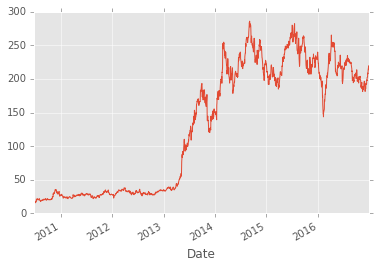

In [111]:
df['Adj Close'].plot();

In [112]:
# Create a 100 day moving average MA
df['100MA'] = df['Adj Close'].rolling(center=False, window=100, min_periods=0).mean()


df.head()

,Open,High,Low,Close,Volume,Adj Close,100MA
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,20.998000


Resampling data means to change timeframes

In [113]:
# Create to DF of show OHLC and Volume
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_ohlc.reset_index(inplace=True)
df_volume = df.Volume.resample('10D').sum()
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [114]:
df_volume.head()

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int64

Scrape Wikipedia for S&P 500 Companies

In [115]:
import bs4 as bs
import pickle
import requests

In [76]:
def get_tickers():
    response = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(response.text, 'lxml')
    
    # Table data
    table = soup.find('table', {'class': 'wikitable sortable'})
    
    # Parse the tickers and save to list
    tickers = []
    
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    
    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers,f)
    
    return tickers

In [117]:
tickers = get_tickers()

In [116]:
# Pull the data from Yahoo
def get_yahoo_data(reload_sp500=False, year=2016, month=12, day=31):
    # See if user wants to reload/update the S&P 500 ticker list
    if reload_sp500:
        tickers = get_tickers()
        
    else:
        # Get our tickers list
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    
    # Check if there's a directory to save the data
    if not os.path.exists('S&P Data'):
        os.makedirs("S&P Data")
        
    # Define our start and end time frame
    start = dt.datetime(2000,1,1)
    end = dt.datetime(year,month,day)
    
    # Iterate through the tickers, query Yahoo, then save the data
    for ticker in tickers:
        # Check if there's a file
        if not os.path.exists('S&P Data/{}.csv'.format(ticker)):
            
            # Try
            try:
                # Prompt
                print('Getting {} from Yahoo'.format(ticker))

                # Get the ticker DataFrame
                ticker_data = web.DataReader(ticker, data_source='yahoo', start=start, end=end)

                # Save it as a csv in the directory
                ticker_data.to_csv('S&P Data/{}.csv'.format(ticker))
            except:
                print("Could not get {}".format(ticker))
                pass
            
        else:
            print('Already have {}'.format(ticker))

In [86]:
get_yahoo_data()

Already have MMM
Already have ABT
Already have ABBV
Already have ACN
Already have ATVI
Already have AYI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have AGN
Already have LNT
Already have ALXN
Already have ALLE
Already have ADS
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANTM
Already have AON
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have ADM
Already have ARNC
Already have AJG
Already have AIZ
Already have T
Already have ADSK
Already have ADP
Already have AN
Already have AZO
Alre

In [104]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'chunkers',
 'corpora',
 'Examining the Titanic Survival.ipynb',
 'grammars',
 'help',
 'Learn Python.ipynb',
 'misc',
 'models',
 'News for Stock Market Prediction.ipynb',
 'Pandas for Data Analysis Notes 1.ipynb',
 'pandas For Finance Quantopian.html',
 'Pandas From the Ground Up.ipynb',
 'pandas with Time Series.ipynb',
 'pycon-2016-tutorial-master',
 'PyCon2016-master',
 'Python For Finance.ipynb',
 'sp500tickers.pickle',
 'SPData',
 'stemmers',
 'taggers',
 'ThinkComplexity.ipynb',
 'tokenizers',
 'TotalSP500.csv',
 'Tweepy Fun.ipynb',
 'Twython Fun.ipynb',
 'zillow.csv']

In [138]:
def combine_sp500_data():
    # Get our tickers
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    # Create an empty list
    ticker_df_list = []
    
    # Iterate through list
    for ticker in tickers:
        try:
            df = pd.read_csv('S&P Data/{}.csv'.format(ticker))

            # Set the index
            df.set_index('Date', inplace=True)

            # Drop unnessary
            df.drop(['Open','High','Low','Close','Volume'], 1, inplace=True)
            
            # Rename the column
            df.columns = [str(ticker)]
            
            # Append the ticker to the ticker_df_list
            ticker_df_list.append(df)

        except:
            pass
        
    # Iterate through the list of ticker dataFrames and append them to a main
    # empty DataFrame
    main_df = pd.DataFrame()
    
    for ticker_df in ticker_df_list:
        # Check if main_df is empty
        if main_df.empty:
            print('main_df empty; assigning {} as first'.format(ticker_df.columns[0]))
            
            main_df = ticker_df
            
        else:
            # Update
            print('Joining {}'.format(ticker_df.columns[0]))
            # Append
            main_df = main_df.join(ticker_df)
    
    # Return the DataFrame containing all securities in the S&P 500
    return main_df

    # SAve to a csv
    main_df.to('Total-SP500.csv')

In [139]:
# Get the data
sp_df = combine_sp500_data()

main_df empty; assigning MMM as first
Joining ABT
Joining ABBV
Joining ACN
Joining ATVI
Joining AYI
Joining ADBE
Joining AMD
Joining AAP
Joining AES
Joining AET
Joining AMG
Joining AFL
Joining A
Joining APD
Joining AKAM
Joining ALK
Joining ALB
Joining ARE
Joining AGN
Joining LNT
Joining ALXN
Joining ALLE
Joining ADS
Joining ALL
Joining GOOGL
Joining GOOG
Joining MO
Joining AMZN
Joining AEE
Joining AAL
Joining AEP
Joining AXP
Joining AIG
Joining AMT
Joining AWK
Joining AMP
Joining ABC
Joining AME
Joining AMGN
Joining APH
Joining APC
Joining ADI
Joining ANTM
Joining AON
Joining APA
Joining AIV
Joining AAPL
Joining AMAT
Joining ADM
Joining ARNC
Joining AJG
Joining AIZ
Joining T
Joining ADSK
Joining ADP
Joining AN
Joining AZO
Joining AVB
Joining AVY
Joining BHI
Joining BLL
Joining BAC
Joining BK
Joining BCR
Joining BAX
Joining BBT
Joining BDX
Joining BBBY
Joining BBY
Joining BIIB
Joining BLK
Joining HRB
Joining BA
Joining BWA
Joining BXP
Joining BSX
Joining BMY
Joining AVGO
Joining CHRW
Jo

In [141]:
# Check our work
sp_df.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,31.131128,9.517434,NaN,NaN,1.259640,NaN,16.274673,15.500,NaN,32.346420,...,8.593504,12.447396,35.497325,32.099796,NaN,118.750000,5.302430,NaN,43.646065,NaN
2000-01-04,29.894130,9.245507,NaN,NaN,1.221324,NaN,14.909400,14.625,NaN,31.063717,...,8.791381,11.868447,34.690567,30.654915,NaN,110.750000,5.195849,NaN,41.532573,NaN
2000-01-05,30.760029,9.228512,NaN,NaN,1.226114,NaN,15.204175,15.000,NaN,31.398335,...,9.130598,12.479560,33.931266,30.928271,NaN,102.625000,5.222494,NaN,41.483422,NaN
2000-01-06,33.234026,9.551425,NaN,NaN,1.202166,NaN,15.328291,16.000,NaN,31.649299,...,9.045794,12.222249,30.988975,31.162576,NaN,92.046875,5.178085,NaN,42.073233,NaN
2000-01-07,33.893758,9.653397,NaN,NaN,1.235693,NaN,16.072985,16.250,NaN,32.262765,...,9.045794,12.511724,34.500742,33.232271,NaN,101.812500,5.062622,NaN,42.171535,NaN


Exploratory analysis

In [145]:
# Correlation
sp_df.corr()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.947679,0.917590,0.966604,0.926806,0.962077,0.931898,-0.517663,0.967155,-0.281273,...,0.942214,0.080757,0.526953,-0.229618,0.916969,0.313431,0.929280,0.870613,-0.322677,0.874646
ABT,0.947679,1.000000,0.870608,0.955049,0.893521,0.901497,0.889369,-0.587180,0.955766,-0.232841,...,0.943482,0.013932,0.511148,-0.347288,0.704375,0.258494,0.953697,0.791224,-0.419769,0.754310
ABBV,0.917590,0.870608,1.000000,0.783880,0.740370,0.831226,0.868343,0.188658,0.896813,0.056811,...,0.786756,0.469999,0.571516,0.840387,0.748861,0.756610,0.815228,0.901949,0.366802,0.873570
ACN,0.966604,0.955049,0.783880,1.000000,0.937597,0.957246,0.923483,-0.512978,0.963517,0.041311,...,0.980756,0.073094,0.893266,-0.329359,0.898886,0.559392,0.963242,0.784805,-0.437436,0.892823
ATVI,0.926806,0.893521,0.740370,0.937597,1.000000,0.966880,0.939472,-0.525560,0.908455,-0.256417,...,0.926850,0.015253,0.467261,-0.344280,0.893637,0.249362,0.882910,0.774546,-0.373834,0.823783
AYI,0.962077,0.901497,0.831226,0.957246,0.966880,1.000000,0.963449,-0.418995,0.945845,0.108571,...,0.943023,0.129481,0.862417,-0.178495,0.904612,0.604032,0.873404,0.822774,-0.304911,0.882646
ADBE,0.931898,0.889369,0.868343,0.923483,0.939472,0.963449,1.000000,-0.336150,0.919647,-0.062289,...,0.906563,0.224117,0.596871,-0.168262,0.931147,0.447534,0.833910,0.882496,-0.192228,0.871367
AMD,-0.517663,-0.587180,0.188658,-0.512978,-0.525560,-0.418995,-0.336150,1.000000,-0.474792,0.610975,...,-0.498306,0.462490,0.067316,0.497921,0.223433,0.322440,-0.616402,-0.163951,0.642128,0.232265
AAP,0.967155,0.955766,0.896813,0.963517,0.908455,0.945845,0.919647,-0.474792,1.000000,0.100013,...,0.952208,0.101966,0.879274,-0.272856,0.803637,0.609617,0.933894,0.800666,-0.400396,0.805070
AES,-0.281273,-0.232841,0.056811,0.041311,-0.256417,0.108571,-0.062289,0.610975,0.100013,1.000000,...,-0.136319,0.296433,0.430752,0.187204,0.298222,0.374730,-0.307253,0.260974,0.232379,-0.326204


It's better to look at correlation during certain time periods; better to graph it and see how the correlations look over time
- Mean Reversion: When two securities that are highly correlated begin to go out of correlation, buy the decreasing one and short the increasing one.
- Neutral Correlation: Invest only in non-correlated stocks.

Is there a way we can write an algo to find good correlations for trading strategies?
- Sets of companies are likely to highly correlated w/ each other; but some of these will move at different time points than its peers.
- Each model will be on a per company basis, but each company's labels will be pricing data for all other companies in the S&P.
- It'd be best to look at recent (like 1 or 2 year past data to truly analyze a company's correlation)

#### We will now look at Housing Price Data

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import style
import Quandl
from statistics import mean



In [33]:
data = Quandl.get("FMAC/HPI_OH", api_key=api)

data.head()

,Value
Date,
1975-01-31,30.243009
1975-02-28,30.325926
1975-03-31,30.512878
1975-04-30,30.753127
1975-05-31,30.997890


In [16]:
# Returns list of DataFrames
state_html = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')

In [17]:
# Get the first row of the first DataFrame
states = list(state_html[0][1:].loc[:,0])
states

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [18]:
# Loop through the states the print the API Query
for state in states:
    print('FMAC/HPI_{}'.format(state))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


pd.merge(df1, df2, on = 'index or column', how='inner - intersection of the indices', 'outer - union of indices')

In [19]:
# Function to get state abbreviation list.
def get_states_abbrev():
    # Returns list of state abbreviations
    state_html = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    states_list = list(state_html[0][1:].loc[:,0])
    
    return states_list

In [20]:
# Get states abbrev
states = get_states_abbrev()
states

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [21]:
# Function that returns HPI data by state; returns a list of dataframes, each being a state.
def get_hpi_data(states_list):
    # Create list to hold the DataFrames
    list_of_df = []
    
    # Loop through the list, querying each state's data
    for state in states_list:
        # Try and except
        # Get the data
        try:
            # Query
            query = "FMAC/HPI_{}".format(state)
            
            # Get the Data
            print('Getting {}'.format(state))
            dataFrame = Quandl.get(query, api_key=api)
            dataFrame.columns = [str(state)]
            dataFrame[state] = ((dataFrame[state] - dataFrame[state][0]) / (dataFrame[state][0])) * 100
            
            # Append
            list_of_df.append(dataFrame)
            
        except Exception as e:
            print(e)
        
    return list_of_df

In [22]:
# Get the HPI data
states_df_list = get_hpi_data(states)

Getting AL
Getting AK
Getting AZ
Getting AR
Getting CA
Getting CO
Getting CT
Getting DE
Getting FL
Getting GA
Getting HI
Getting ID
Getting IL
Getting IN
Getting IA
Getting KS
Getting KY
Getting LA
Getting ME
Getting MD
Getting MA
Getting MI
Getting MN
Getting MS
Getting MO
Getting MT
Getting NE
Getting NV
Getting NH
Getting NJ
Getting NM
Getting NY
Getting NC
Getting ND
Getting OH
Getting OK
Getting OR
Getting PA
Getting RI
Getting SC
Getting SD
Getting TN
Getting TX
Getting UT
Getting VT
Getting VA
Getting WA
Getting WV
Getting WI
Getting WY


In [23]:
# Check our work
states_df_list

[                    AL
 Date                  
 1975-01-31    0.000000
 1975-02-28    0.628933
 1975-03-31    1.363531
 1975-04-30    2.261745
 1975-05-31    3.115526
 1975-06-30    3.592427
 1975-07-31    3.507497
 1975-08-31    2.957023
 1975-09-30    2.280339
 1975-10-31    1.924847
 1975-11-30    2.155666
 1975-12-31    3.050604
 1976-01-31    4.538531
 1976-02-29    6.268553
 1976-03-31    7.792380
 1976-04-30    8.841236
 1976-05-31    9.429481
 1976-06-30    9.694968
 1976-07-31    9.821511
 1976-08-31    9.854818
 1976-09-30    9.829164
 1976-10-31    9.934521
 1976-11-30   10.341145
 1976-12-31   10.832253
 1977-01-31   11.121382
 1977-02-28   11.271538
 1977-03-31   11.454037
 1977-04-30   11.941379
 1977-05-31   12.779945
 1977-06-30   13.893344
 ...                ...
 2014-07-31  252.707517
 2014-08-31  253.174322
 2014-09-30  251.755456
 2014-10-31  249.510877
 2014-11-30  247.990691
 2014-12-31  247.764340
 2015-01-31  248.621095
 2015-02-28  249.948167
 2015-03-31  252

In [36]:
# Function that applies DataFrame.join() to a  list dataframes into a single dataframe
# Function takes a list of state abbreviations too
def join_on_index(df_list):
    
    # Create the main DataFrame
    main_df = pd.DataFrame()
    
    # Loop through the list of DataFrames
    for df in df_list:
        # Check if empty; AKA it's the first DataFrame
        if main_df.empty:
            main_df = df
        
        else:
            main_df = main_df.join(df)
           
    # Return the joined DataFrame
    return main_df.sort_index(ascending=True)

Let's define a function that let's us add another variable to the data set

In [25]:
# Given a proper 'code' it'll return that code's data in DataFrame object
def get_comparable(code):
    # Query Quandl
    data = Quandl.get('FMAC/HPI_{}'.format(code), api_key=api)
    
    # Make the percent change
    data.columns = [str(code)]
    data[code] = ((data[code] - data[code][0]) / (data[code][0])) * 100
    
    # Return
    return data

Try this out for Cleveland

In [26]:
code = 'CLEOH'
get_comparable(code)

,CLEOH
Date,
1975-01-31,0.000000
1975-02-28,0.387022
1975-03-31,1.117258
1975-04-30,2.046508
1975-05-31,3.028183
1975-06-30,4.042782
1975-07-31,4.924335
1975-08-31,5.439466
1975-09-30,5.786955


Join the list of dataframes based upon their index.

In [27]:
hpi_df = join_on_index(states_df_list)

.join() when index matters, pd.merge() when similar columns exist and index does not matter.

Now we have a DataFrame w/ each state's HPI Data, shared by the same date index.

In [28]:
hpi_df.head(10)

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-02-28,0.628933,1.481135,1.775578,0.848253,0.352137,1.160075,2.160613,0.089288,3.783323,-0.970722,...,-1.095463,0.177011,0.997977,1.411745,0.956397,1.011127,0.412904,2.537360,1.363375,1.551914
1975-03-31,1.363531,2.996464,3.437191,1.588216,1.578298,2.303064,3.783125,0.282646,9.475745,-1.403272,...,-2.210706,0.480697,2.759455,2.675295,1.879806,1.744991,1.060511,5.180582,2.714008,3.189263
1975-04-30,2.261745,4.576212,4.707078,2.196974,3.581731,3.360907,4.674912,0.737982,16.517958,-1.218163,...,-3.319466,0.898451,5.306995,3.669626,2.718869,2.277551,1.841242,7.907138,3.928106,4.874640
1975-05-31,3.115526,6.298360,5.335401,2.808347,5.252210,4.223948,4.914211,1.558554,17.344382,-0.825102,...,-4.325695,1.364301,6.071130,4.322656,3.454890,2.712905,2.550473,10.652748,4.925554,6.501917
1975-06-30,3.592427,8.137815,5.121657,3.473926,5.992090,4.948514,4.731310,2.563607,12.152619,-0.674313,...,-5.078923,1.859167,4.801899,4.511405,4.117454,3.127560,3.278300,13.275919,5.695361,8.022014
1975-07-31,3.507497,9.974598,4.028300,4.058282,6.774855,5.455158,4.492816,3.480947,8.227574,-0.980656,...,-5.553759,2.358930,3.956510,4.232114,4.677158,3.754476,4.091737,15.585063,6.298197,9.430435
1975-08-31,2.957023,11.646186,2.344677,4.417688,8.187315,5.444907,4.417946,4.271954,6.367529,-1.764239,...,-5.881665,2.883824,3.888464,3.789826,5.063729,4.439560,4.616752,17.439205,6.822844,10.686032
1975-09-30,2.280339,13.101144,0.600866,4.459315,9.716017,5.069717,4.580908,4.932800,5.939257,-2.893618,...,-6.139083,3.591731,4.175912,3.588297,5.302030,4.692156,4.689623,18.702687,7.497692,11.753773


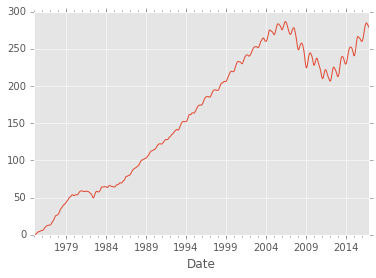

In [29]:
# Check out Ohio's HPI Data
hpi_df['OH'].plot();

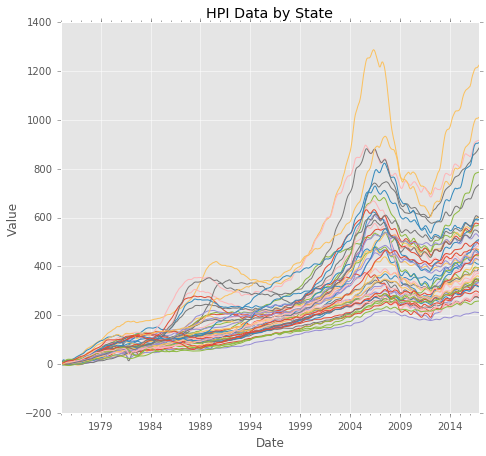

In [30]:
# Check the entire DataFrame
hpi_df.plot(legend=False, figsize=(7.5, 7))
plt.title('HPI Data by State')
plt.xlabel('Date')
plt.ylabel('Value');

In [31]:
# Add CleOH to the DataFrame
hpi_df = hpi_df.join(get_comparable('CLEOH'))

Let's look at some statistics

In [32]:
hpi_df.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,CLEOH
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,146.078968,193.860390,221.261814,144.268044,511.202259,296.534894,279.308152,249.160131,215.955620,158.592617,...,169.182586,181.789297,248.622005,264.313384,255.881968,407.283765,127.161078,194.274999,217.497470,169.905950
std,85.871719,121.093383,155.972869,81.687092,365.888053,203.513381,167.161708,170.459113,160.150106,98.441177,...,103.676326,105.564416,168.065370,179.684576,183.312171,287.245649,75.200393,124.715333,154.270665,89.095355
min,0.000000,0.000000,-0.367885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.130379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.193818,105.306212,114.024090,79.511632,197.351989,127.278043,136.984493,92.342741,98.061272,79.598887,...,77.835271,110.903413,101.164236,95.372641,97.821941,134.173951,60.662556,69.812977,96.376207,73.484239
50%,139.961804,150.283579,170.321466,136.866786,392.438462,244.916063,264.263383,205.561682,153.168483,145.054054,...,159.049682,141.496331,244.253624,214.476042,190.094053,341.819752,116.616500,186.246375,169.584760,195.321313
75%,227.970427,344.506645,316.096502,232.619361,778.620283,485.967972,435.073364,422.575435,317.792023,248.245417,...,271.255780,281.971068,388.553294,490.724025,458.965118,659.974627,215.870006,320.429763,410.835765,245.138823
max,287.753837,417.125380,609.345522,274.636852,1287.472768,786.368175,575.392736,554.299884,622.979827,334.100349,...,371.015243,450.154651,594.230498,538.443216,589.008067,1010.715816,257.537512,390.488779,499.206123,305.132948


When a housing market diverges from the other assets and you think the market is still good long-term, it may be best to buy that asset.
- Or one could short ETFs or housing builders if you wanted to make a sell-short

In [33]:
hpi_df.corr()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,CLEOH
AL,1.000000,0.947107,0.938359,0.995164,0.942805,0.963719,0.952720,0.982919,0.930279,0.978545,...,0.994036,0.939025,0.978968,0.978966,0.975649,0.984255,0.982378,0.991313,0.947372,0.939859
AK,0.947107,1.000000,0.912119,0.968356,0.923340,0.960033,0.884038,0.938291,0.902803,0.901707,...,0.958823,0.979162,0.964510,0.956585,0.962720,0.959405,0.973056,0.931812,0.987558,0.807695
AZ,0.938359,0.912119,1.000000,0.937231,0.977278,0.920641,0.916472,0.948774,0.994519,0.950162,...,0.933729,0.898537,0.937735,0.925468,0.959059,0.957680,0.921098,0.936437,0.911268,0.865569
AR,0.995164,0.968356,0.937231,1.000000,0.946291,0.975228,0.944166,0.977975,0.928975,0.968769,...,0.995214,0.960422,0.982644,0.982046,0.980278,0.983522,0.990800,0.986486,0.964630,0.920812
CA,0.942805,0.923340,0.977278,0.946291,1.000000,0.939810,0.940457,0.967315,0.986143,0.952560,...,0.946745,0.919297,0.930199,0.956861,0.979669,0.965822,0.937809,0.945505,0.921244,0.872793
CO,0.963719,0.960033,0.920641,0.975228,0.939810,1.000000,0.885086,0.934342,0.912223,0.956144,...,0.981782,0.978643,0.978719,0.947020,0.952887,0.972774,0.977308,0.965367,0.959487,0.893071
CT,0.952720,0.884038,0.916472,0.944166,0.940457,0.885086,1.000000,0.979582,0.925005,0.946076,...,0.938656,0.868702,0.888873,0.967556,0.961649,0.926272,0.914262,0.938925,0.871489,0.893964
DE,0.982919,0.938291,0.948774,0.977975,0.967315,0.934342,0.979582,1.000000,0.953096,0.960831,...,0.973770,0.916146,0.949596,0.992099,0.992371,0.977811,0.965571,0.974243,0.938633,0.903507
FL,0.930279,0.902803,0.994519,0.928975,0.986143,0.912223,0.925005,0.953096,1.000000,0.945149,...,0.924497,0.884974,0.920388,0.927958,0.962156,0.952001,0.912292,0.934895,0.901083,0.863967
GA,0.978545,0.901707,0.950162,0.968769,0.952560,0.956144,0.946076,0.960831,0.945149,1.000000,...,0.974919,0.916544,0.950769,0.943812,0.950549,0.963254,0.942273,0.977651,0.893563,0.961217


The entire housing market is incredibly correlated.

Resampling data allows you to change the time granularity.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


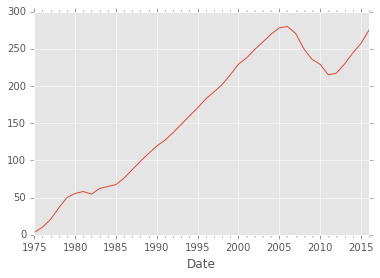

In [34]:
hpi_df.OH.resample('A').plot();

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


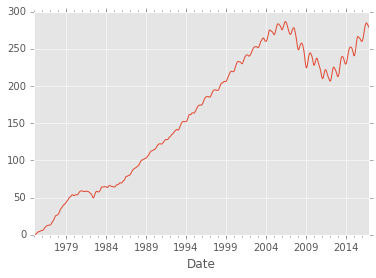

In [35]:
hpi_df.OH.resample('M').plot();

Rolling & Moving Statistics / Moments
- Rolling: use a window of time data and then apply some function to that time window.

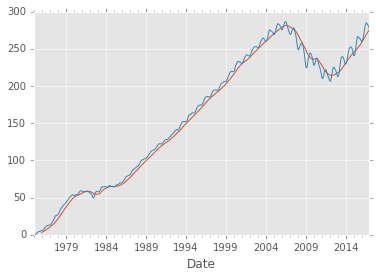

In [36]:
# Calculate a rolling mean / moving average
# OH 12MA
hpi_df.OH.rolling(12).mean().plot()
hpi_df.OH.plot();

Standard deviations:
- Helps identify problem points and outliers
- Shows volatility (higher standard dev => high vol.)

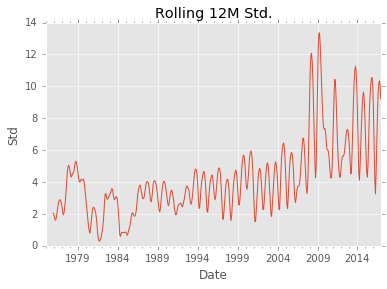

In [37]:
# Show rolling 12 months standard deviation
plt.title('Rolling 12M Std.')
plt.xlabel('Date')
plt.ylabel('Std')
hpi_df.OH.rolling(12).std().plot();

Rolling correlations
- Good for pairs trading; if the assets or securities diverge (i.e. low negative corr, then you could buy the divergence)
- Negative correlation => trending in opposite directions
- To profit: Short the increasing asset and buy the decreasing asset; this creates a market neutral strategy. Close out of the deal when the assets are back in perfect correlation.

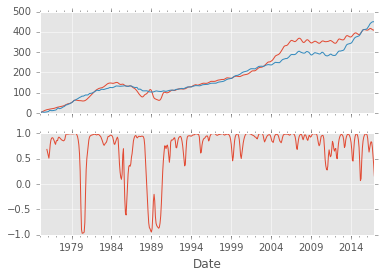

In [38]:
# Plot the two graphs
# Create the figures
ax_1 = plt.subplot2grid((2,1), (0,0))
ax_2 = plt.subplot2grid((2,1),(1,0), sharex=ax_1)

# Plot
hpi_df.AK.plot(ax=ax_1, label='AK HPI')
hpi_df.TX.plot(ax=ax_1, label='TX HPI')
hpi_df.TX.rolling(12).corr(hpi_df.AK).plot(ax=ax_2);

In [39]:
# Get 30 Mortgage rates
def get_thirty_year_rate():
    # Query for the data
    thirty_year_df = Quandl.get('FMAC/30US',trim_start='1975-01-01', api_key=api)
    
    # Change column name
    thirty_year_df.columns = ['thirty_year']
    
    # Convert to a percent change
    thirty_year_df['thirty_year'] = (thirty_year_df['thirty_year'] - thirty_year_df['thirty_year'][0]) / (thirty_year_df['thirty_year'][0]) * 100
    
    # Resample
    thirty_year_df = thirty_year_df.resample('D').mean().resample('M').mean()
    
    return thirty_year_df

In [40]:
# Get the 30y mortgage data
m30 = get_thirty_year_rate()

# join it to the hpi_df
hpi_df = hpi_df.join(m30)

In [41]:
# check our work
hpi_df

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TX,UT,VT,VA,WA,WV,WI,WY,CLEOH,thirty_year
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.750000
1975-02-28,0.628933,1.481135,1.775578,0.848253,0.352137,1.160075,2.160613,0.089288,3.783323,-0.970722,...,0.997977,1.411745,0.956397,1.011127,0.412904,2.537360,1.363375,1.551914,0.387022,-5.156250
1975-03-31,1.363531,2.996464,3.437191,1.588216,1.578298,2.303064,3.783125,0.282646,9.475745,-1.403272,...,2.759455,2.675295,1.879806,1.744991,1.060511,5.180582,2.714008,3.189263,1.117258,-7.265625
1975-04-30,2.261745,4.576212,4.707078,2.196974,3.581731,3.360907,4.674912,0.737982,16.517958,-1.218163,...,5.306995,3.669626,2.718869,2.277551,1.841242,7.907138,3.928106,4.874640,2.046508,-8.125000
1975-05-31,3.115526,6.298360,5.335401,2.808347,5.252210,4.223948,4.914211,1.558554,17.344382,-0.825102,...,6.071130,4.322656,3.454890,2.712905,2.550473,10.652748,4.925554,6.501917,3.028183,-7.229167
1975-06-30,3.592427,8.137815,5.121657,3.473926,5.992090,4.948514,4.731310,2.563607,12.152619,-0.674313,...,4.801899,4.511405,4.117454,3.127560,3.278300,13.275919,5.695361,8.022014,4.042782,-7.369792
1975-07-31,3.507497,9.974598,4.028300,4.058282,6.774855,5.455158,4.492816,3.480947,8.227574,-0.980656,...,3.956510,4.232114,4.677158,3.754476,4.091737,15.585063,6.298197,9.430435,4.924335,-7.395833
1975-08-31,2.957023,11.646186,2.344677,4.417688,8.187315,5.444907,4.417946,4.271954,6.367529,-1.764239,...,3.888464,3.789826,5.063729,4.439560,4.616752,17.439205,6.822844,10.686032,5.439466,-6.854167
1975-09-30,2.280339,13.101144,0.600866,4.459315,9.716017,5.069717,4.580908,4.932800,5.939257,-2.893618,...,4.175912,3.588297,5.302030,4.692156,4.689623,18.702687,7.497692,11.753773,5.786955,-4.895833


In [42]:
hpi_df.corr()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TX,UT,VT,VA,WA,WV,WI,WY,CLEOH,thirty_year
AL,1.000000,0.947107,0.938359,0.995164,0.942805,0.963719,0.952720,0.982919,0.930279,0.978545,...,0.939025,0.978968,0.978966,0.975649,0.984255,0.982378,0.991313,0.947372,0.939859,-0.798781
AK,0.947107,1.000000,0.912119,0.968356,0.923340,0.960033,0.884038,0.938291,0.902803,0.901707,...,0.979162,0.964510,0.956585,0.962720,0.959405,0.973056,0.931812,0.987558,0.807695,-0.737889
AZ,0.938359,0.912119,1.000000,0.937231,0.977278,0.920641,0.916472,0.948774,0.994519,0.950162,...,0.898537,0.937735,0.925468,0.959059,0.957680,0.921098,0.936437,0.911268,0.865569,-0.678356
AR,0.995164,0.968356,0.937231,1.000000,0.946291,0.975228,0.944166,0.977975,0.928975,0.968769,...,0.960422,0.982644,0.982046,0.980278,0.983522,0.990800,0.986486,0.964630,0.920812,-0.791363
CA,0.942805,0.923340,0.977278,0.946291,1.000000,0.939810,0.940457,0.967315,0.986143,0.952560,...,0.919297,0.930199,0.956861,0.979669,0.965822,0.937809,0.945505,0.921244,0.872793,-0.737170
CO,0.963719,0.960033,0.920641,0.975228,0.939810,1.000000,0.885086,0.934342,0.912223,0.956144,...,0.978643,0.978719,0.947020,0.952887,0.972774,0.977308,0.965367,0.959487,0.893071,-0.788726
CT,0.952720,0.884038,0.916472,0.944166,0.940457,0.885086,1.000000,0.979582,0.925005,0.946076,...,0.868702,0.888873,0.967556,0.961649,0.926272,0.914262,0.938925,0.871489,0.893964,-0.751813
DE,0.982919,0.938291,0.948774,0.977975,0.967315,0.934342,0.979582,1.000000,0.953096,0.960831,...,0.916146,0.949596,0.992099,0.992371,0.977811,0.965571,0.974243,0.938633,0.903507,-0.792521
FL,0.930279,0.902803,0.994519,0.928975,0.986143,0.912223,0.925005,0.953096,1.000000,0.945149,...,0.884974,0.920388,0.927958,0.962156,0.952001,0.912292,0.934895,0.901083,0.863967,-0.686445
GA,0.978545,0.901707,0.950162,0.968769,0.952560,0.956144,0.946076,0.960831,0.945149,1.000000,...,0.916544,0.950769,0.943812,0.950549,0.963254,0.942273,0.977651,0.893563,0.961217,-0.755986


Note that there's a strong negative correlation w/ homeprice indices and interest rates.

We could craft an algorithm (a regression analysis):
- HPI_hat = (30M x B_1) + (X_2 x B_2) + ...
- If current HPI > HPI_hat, then market may be overbought
- If current HPI < HPI_hat, then market may be oversold

- Buy the securities/assets that trend down (they've become negatively correlated) from it's other correlated assets/securities.
- Look at future interest rate derivatives to see how people are pricing in rates.
- Any security that trends away it's correlation with another asset is an opportunity to trade it.

In [43]:
# Lets add the US_HPI Data to our data
hpi_df = hpi_df.join(get_comparable('USA'))

In [44]:
hpi_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,UT,VT,VA,WA,WV,WI,WY,CLEOH,thirty_year,USA
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.750000,0.000000
1975-02-28,0.628933,1.481135,1.775578,0.848253,0.352137,1.160075,2.160613,0.089288,3.783323,-0.970722,...,1.411745,0.956397,1.011127,0.412904,2.537360,1.363375,1.551914,0.387022,-5.156250,0.638828
1975-03-31,1.363531,2.996464,3.437191,1.588216,1.578298,2.303064,3.783125,0.282646,9.475745,-1.403272,...,2.675295,1.879806,1.744991,1.060511,5.180582,2.714008,3.189263,1.117258,-7.265625,1.681048
1975-04-30,2.261745,4.576212,4.707078,2.196974,3.581731,3.360907,4.674912,0.737982,16.517958,-1.218163,...,3.669626,2.718869,2.277551,1.841242,7.907138,3.928106,4.874640,2.046508,-8.125000,3.044245
1975-05-31,3.115526,6.298360,5.335401,2.808347,5.252210,4.223948,4.914211,1.558554,17.344382,-0.825102,...,4.322656,3.454890,2.712905,2.550473,10.652748,4.925554,6.501917,3.028183,-7.229167,3.914542


Let's add another economic indicator: GDP and Equities Markets
- Diversification smooths out volatility and spreads risk.
- You want indicators and other securities that are 0 correlated.

In [45]:
# Get S&P 500 data
def get_sp500_data():
    # Get the data from Quandl
    sp_500_raw = Quandl.get('YAHOO/INDEX_GSPC', trim_start='1975-01-01', api_key=api)
    
    # Calculate the % change
    sp_500_raw['Adjusted Close'] = ((sp_500_raw['Adjusted Close'] / sp_500_raw['Adjusted Close'][0]) - 1) * 100
    
    # Resample - this data is daily
    sp_500_raw = sp_500_raw.resample('M').mean()
    
    # Change the Adjusted Close label name
    sp_500_raw.rename(columns={'Adjusted Close':'sp500'}, inplace=True)
    
    # Return the data
    return sp_500_raw['sp500']

In [46]:
# get the S&P 500 data
hpi_df['sp500'] = get_sp500_data()

In [47]:
# Check our work
hpi_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,VT,VA,WA,WV,WI,WY,CLEOH,thirty_year,USA,sp500
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.750000,0.000000,3.323491
1975-02-28,0.628933,1.481135,1.775578,0.848253,0.352137,1.160075,2.160613,0.089288,3.783323,-0.970722,...,0.956397,1.011127,0.412904,2.537360,1.363375,1.551914,0.387022,-5.156250,0.638828,14.049322
1975-03-31,1.363531,2.996464,3.437191,1.588216,1.578298,2.303064,3.783125,0.282646,9.475745,-1.403272,...,1.879806,1.744991,1.060511,5.180582,2.714008,3.189263,1.117258,-7.265625,1.681048,19.367785
1975-04-30,2.261745,4.576212,4.707078,2.196974,3.581731,3.360907,4.674912,0.737982,16.517958,-1.218163,...,2.718869,2.277551,1.841242,7.907138,3.928106,4.874640,2.046508,-8.125000,3.044245,20.636734
1975-05-31,3.115526,6.298360,5.335401,2.808347,5.252210,4.223948,4.914211,1.558554,17.344382,-0.825102,...,3.454890,2.712905,2.550473,10.652748,4.925554,6.501917,3.028183,-7.229167,3.914542,28.287322


In [48]:
def get_gdp_data():
    # Query Quandl
    gdp = Quandl.get('BCB/4385', trim_start='1975-01-01', api_key=api)
    
    # Change the column name
    gdp.columns = ['gdp']
    
    # Calculate the percent change
    gdp['gdp'] = ((gdp['gdp']/gdp['gdp'][0]) - 1) * 100
    
    # Resample
    gdp = gdp.resample('M').mean()
    
    # Return the data
    return gdp

In [49]:
# Add the gdp indicator the the hpi_df DataFrame
hpi_df = hpi_df.join(get_gdp_data())

In [51]:
hpi_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,VA,WA,WV,WI,WY,CLEOH,thirty_year,USA,sp500,gdp
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.750000,0.000000,3.323491,NaN
1975-02-28,0.628933,1.481135,1.775578,0.848253,0.352137,1.160075,2.160613,0.089288,3.783323,-0.970722,...,1.011127,0.412904,2.537360,1.363375,1.551914,0.387022,-5.156250,0.638828,14.049322,NaN
1975-03-31,1.363531,2.996464,3.437191,1.588216,1.578298,2.303064,3.783125,0.282646,9.475745,-1.403272,...,1.744991,1.060511,5.180582,2.714008,3.189263,1.117258,-7.265625,1.681048,19.367785,NaN
1975-04-30,2.261745,4.576212,4.707078,2.196974,3.581731,3.360907,4.674912,0.737982,16.517958,-1.218163,...,2.277551,1.841242,7.907138,3.928106,4.874640,2.046508,-8.125000,3.044245,20.636734,NaN
1975-05-31,3.115526,6.298360,5.335401,2.808347,5.252210,4.223948,4.914211,1.558554,17.344382,-0.825102,...,2.712905,2.550473,10.652748,4.925554,6.501917,3.028183,-7.229167,3.914542,28.287322,NaN


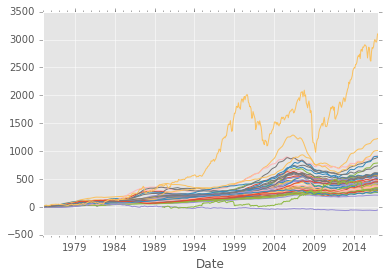

In [52]:
hpi_df.plot(legend=False);

Simple strategies tend to do well in the markets.
Simple correlation, trend, and pairs strategies work.m

Consider getting a state's GDP to see if that's a predictor for future home prices.
Consider getting state's unemployment.

Think of ideas and hypotheses to test using pandas and python.

In [53]:
hpi_df.dropna(inplace=True)

In [54]:
hpi_df

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,VA,WA,WV,WI,WY,CLEOH,thirty_year,USA,sp500,gdp
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,97.365667,62.766780,125.567963,89.820723,407.557943,128.640196,288.751294,202.175716,132.615031,116.679680,...,179.672979,225.852063,70.229450,103.257882,76.144389,127.161003,3.072917,198.733695,384.083446,0.000000
1990-02-28,97.341816,64.568693,125.592868,90.092806,409.288571,128.852034,286.368165,203.500732,132.183145,116.164692,...,179.367397,234.527611,70.615432,104.584776,76.763205,127.787343,6.223958,199.358913,370.529148,-2.697505
1990-03-31,97.721751,68.674098,125.283541,90.573627,412.301804,128.989583,283.558547,203.802163,132.073636,115.376676,...,179.540694,243.043831,71.226636,106.254463,77.694806,129.040994,6.958333,200.224408,381.937898,-2.065278
1990-04-30,98.436595,75.375435,125.097745,91.058977,414.685426,129.080709,280.328599,203.739039,132.454949,115.169744,...,180.529679,251.366982,72.095606,107.923106,79.165450,130.743479,8.020833,201.267727,381.529238,-10.874318
1990-05-31,99.181005,84.090724,125.377339,91.595876,415.658589,129.761315,277.201745,203.802147,132.983862,115.561621,...,181.570526,258.753652,73.263265,109.153000,81.251493,132.601741,9.140625,202.320112,398.718477,1.006296
1990-06-30,99.583669,92.833431,125.911923,92.187006,417.179764,130.720667,275.241324,203.756422,133.422568,115.901357,...,182.124176,263.365777,74.501149,110.203916,83.528814,134.595873,5.875000,203.359448,413.152002,4.141092
1990-07-31,99.572944,99.249962,126.176102,92.754153,419.221882,131.154610,274.358890,202.994869,133.817516,116.107857,...,182.520972,265.537009,75.335652,111.192735,85.327050,136.286135,4.531250,204.123827,412.645503,5.969284
1990-08-31,99.536952,102.243674,125.845627,93.388812,419.563678,131.036548,273.086374,202.062942,134.094541,116.211917,...,182.340871,267.263199,75.432695,111.621407,86.250312,137.206752,5.208333,204.223575,370.947609,12.926424
1990-09-30,99.759138,102.529954,124.957495,93.893550,417.884298,130.944179,270.150190,202.054314,133.929682,115.818109,...,181.291178,268.322771,74.883036,111.569083,86.415813,137.788021,5.989583,203.679004,349.105552,11.469666


In [55]:
hpi_df.corr()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,VA,WA,WV,WI,WY,CLEOH,thirty_year,USA,sp500,gdp
AL,1.000000,0.956335,0.913098,0.990740,0.896495,0.932994,0.917754,0.960050,0.895820,0.932863,...,0.960193,0.977664,0.973485,0.983311,0.965149,0.783472,-0.804543,0.964784,0.803862,0.682419
AK,0.956335,1.000000,0.841157,0.980286,0.875850,0.936755,0.872026,0.934097,0.827814,0.837688,...,0.962444,0.959778,0.994238,0.917397,0.996449,0.625491,-0.899996,0.938618,0.826927,0.831307
AZ,0.913098,0.841157,1.000000,0.892071,0.961592,0.843387,0.899968,0.925899,0.990819,0.941481,...,0.928369,0.936507,0.855182,0.909001,0.842787,0.797657,-0.620338,0.957908,0.730661,0.466961
AR,0.990740,0.980286,0.892071,1.000000,0.898403,0.953326,0.906676,0.952400,0.877931,0.910613,...,0.967933,0.972372,0.991756,0.974339,0.982398,0.753646,-0.861469,0.965187,0.828632,0.741289
CA,0.896495,0.875850,0.961592,0.898403,1.000000,0.876073,0.930657,0.943009,0.977185,0.923759,...,0.958310,0.936111,0.873840,0.900842,0.863578,0.749633,-0.691918,0.980169,0.737653,0.518286
CO,0.932994,0.936755,0.843387,0.953326,0.876073,1.000000,0.804828,0.858638,0.826977,0.920304,...,0.898707,0.938086,0.952931,0.929167,0.929839,0.768419,-0.867234,0.931626,0.910404,0.668078
CT,0.917754,0.872026,0.899968,0.906676,0.930657,0.804828,1.000000,0.981511,0.922890,0.874353,...,0.960871,0.903638,0.870976,0.923970,0.871901,0.727597,-0.673036,0.949989,0.606134,0.562889
DE,0.960050,0.934097,0.925899,0.952400,0.943009,0.858638,0.981511,1.000000,0.934047,0.889792,...,0.989353,0.959953,0.931906,0.943642,0.936927,0.705085,-0.743991,0.974206,0.683523,0.650758
FL,0.895820,0.827814,0.990819,0.877931,0.977185,0.826977,0.922890,0.934047,1.000000,0.932210,...,0.933074,0.922251,0.836779,0.904834,0.824325,0.798410,-0.611452,0.961171,0.682180,0.434868
GA,0.932863,0.837688,0.941481,0.910613,0.923759,0.920304,0.874353,0.889792,0.932210,1.000000,...,0.889935,0.928490,0.868892,0.955522,0.840807,0.904039,-0.669881,0.951268,0.800819,0.426446


In [56]:
# Calculate percent change
hpi_df = hpi_df.pct_change().dropna()

In [57]:
hpi_df

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,VA,WA,WV,WI,WY,CLEOH,thirty_year,USA,sp500,gdp
Date,,,,,,,,,,,,,,,,,,,,,
1990-02-28,-0.000245,0.028708,0.000198,0.003029,0.004246,0.001647,-0.008253,0.006554,-0.003257,-0.004414,...,-0.001701,0.038413,0.005496,0.012850,0.008127,0.004926,1.025424,0.003146,-0.035290,-inf
1990-03-31,0.003903,0.063582,-0.002463,0.005337,0.007362,0.001068,-0.009811,0.001481,-0.000828,-0.006784,...,0.000966,0.036312,0.008655,0.015965,0.012136,0.009810,0.117992,0.004341,0.030790,-0.234375
1990-04-30,0.007315,0.097582,-0.001483,0.005359,0.005781,0.000706,-0.011391,-0.000310,0.002887,-0.001794,...,0.005508,0.034245,0.012200,0.015704,0.018928,0.013193,0.152695,0.005211,-0.001070,4.265306
1990-05-31,0.007562,0.115625,0.002235,0.005896,0.002347,0.005273,-0.011154,0.000310,0.003993,0.003403,...,0.005766,0.029386,0.016196,0.011396,0.026350,0.014213,0.139610,0.005229,0.045054,-1.092539
1990-06-30,0.004060,0.103968,0.004264,0.006454,0.003660,0.007393,-0.007072,-0.000224,0.003299,0.002940,...,0.003049,0.017824,0.016896,0.009628,0.028028,0.015039,-0.357265,0.005137,0.036200,3.115183
1990-07-31,-0.000108,0.069119,0.002098,0.006152,0.004895,0.003320,-0.003206,-0.003738,0.002960,0.001782,...,0.002179,0.008244,0.011201,0.008973,0.021528,0.012558,-0.228723,0.003759,-0.001226,0.441476
1990-08-31,-0.000361,0.030163,-0.002619,0.006842,0.000815,-0.000900,-0.004638,-0.004591,0.002070,0.000896,...,-0.000987,0.006501,0.001288,0.003855,0.010820,0.006755,0.149425,0.000489,-0.101050,1.165490
1990-09-30,0.002232,0.002800,-0.007057,0.005405,-0.004003,-0.000705,-0.010752,-0.000043,-0.001229,-0.003389,...,-0.005757,0.003965,-0.007287,-0.000469,0.001919,0.004236,0.150000,-0.002667,-0.058882,-0.112696
1990-10-31,0.002662,-0.009617,-0.010076,0.001936,-0.007210,0.002866,-0.015967,0.001503,-0.003921,-0.007287,...,-0.007898,-0.002116,-0.010393,0.000116,-0.001274,0.001874,0.004348,-0.004891,-0.033780,0.028709


We will now do some shifting in the data reponse/label data to see if there's any predictive qualities.

In [58]:
hpi_df['us_hpi_future'] = hpi_df.USA.shift(-1)

hpi_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,WA,WV,WI,WY,CLEOH,thirty_year,USA,sp500,gdp,us_hpi_future
Date,,,,,,,,,,,,,,,,,,,,,
1990-02-28,-0.000245,0.028708,0.000198,0.003029,0.004246,0.001647,-0.008253,0.006554,-0.003257,-0.004414,...,0.038413,0.005496,0.012850,0.008127,0.004926,1.025424,0.003146,-0.035290,-inf,0.004341
1990-03-31,0.003903,0.063582,-0.002463,0.005337,0.007362,0.001068,-0.009811,0.001481,-0.000828,-0.006784,...,0.036312,0.008655,0.015965,0.012136,0.009810,0.117992,0.004341,0.030790,-0.234375,0.005211
1990-04-30,0.007315,0.097582,-0.001483,0.005359,0.005781,0.000706,-0.011391,-0.000310,0.002887,-0.001794,...,0.034245,0.012200,0.015704,0.018928,0.013193,0.152695,0.005211,-0.001070,4.265306,0.005229
1990-05-31,0.007562,0.115625,0.002235,0.005896,0.002347,0.005273,-0.011154,0.000310,0.003993,0.003403,...,0.029386,0.016196,0.011396,0.026350,0.014213,0.139610,0.005229,0.045054,-1.092539,0.005137
1990-06-30,0.004060,0.103968,0.004264,0.006454,0.003660,0.007393,-0.007072,-0.000224,0.003299,0.002940,...,0.017824,0.016896,0.009628,0.028028,0.015039,-0.357265,0.005137,0.036200,3.115183,0.003759


Pandas lets users create their own functions
- Map function
- Rolling apply function

In [59]:
# Create function to make label
def make_label(cur_val, future_val):
    if future_val > cur_val:
        return 1
    else:
        return 0

In [60]:
# Create label column
hpi_df['label'] = list(map(make_label, hpi_df.USA, hpi_df.us_hpi_future))

hpi_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,WV,WI,WY,CLEOH,thirty_year,USA,sp500,gdp,us_hpi_future,label
Date,,,,,,,,,,,,,,,,,,,,,
1990-02-28,-0.000245,0.028708,0.000198,0.003029,0.004246,0.001647,-0.008253,0.006554,-0.003257,-0.004414,...,0.005496,0.012850,0.008127,0.004926,1.025424,0.003146,-0.035290,-inf,0.004341,1
1990-03-31,0.003903,0.063582,-0.002463,0.005337,0.007362,0.001068,-0.009811,0.001481,-0.000828,-0.006784,...,0.008655,0.015965,0.012136,0.009810,0.117992,0.004341,0.030790,-0.234375,0.005211,1
1990-04-30,0.007315,0.097582,-0.001483,0.005359,0.005781,0.000706,-0.011391,-0.000310,0.002887,-0.001794,...,0.012200,0.015704,0.018928,0.013193,0.152695,0.005211,-0.001070,4.265306,0.005229,1
1990-05-31,0.007562,0.115625,0.002235,0.005896,0.002347,0.005273,-0.011154,0.000310,0.003993,0.003403,...,0.016196,0.011396,0.026350,0.014213,0.139610,0.005229,0.045054,-1.092539,0.005137,0
1990-06-30,0.004060,0.103968,0.004264,0.006454,0.003660,0.007393,-0.007072,-0.000224,0.003299,0.002940,...,0.016896,0.009628,0.028028,0.015039,-0.357265,0.005137,0.036200,3.115183,0.003759,0


In [62]:
# Demonstrate how Rolling Apply works
def move_avg(values):
    return mean(values)

In [64]:
# Apply the Rolling apply
hpi_df.thirty_year.rolling(12).apply(move_avg)

Date
1990-02-28         NaN
1990-03-31         NaN
1990-04-30         NaN
1990-05-31         NaN
1990-06-30         NaN
1990-07-31         NaN
1990-08-31         NaN
1990-09-30         NaN
1990-10-31         NaN
1990-11-30         NaN
1990-12-31         NaN
1991-01-31   -0.036437
1991-02-28   -0.727445
1991-03-31   -0.785150
1991-04-30   -0.791625
1991-05-31   -0.787367
1991-06-30   -0.850694
1991-07-31   -1.053856
1991-08-31    0.037025
1991-09-30    0.079886
1991-10-31    0.100972
1991-11-30    0.140561
1991-12-31    0.229430
1992-01-31    0.274611
1992-02-29    0.856586
1992-03-31    0.887294
1992-04-30    0.891383
1992-05-31    0.895614
1992-06-30    1.003260
1992-07-31    1.254687
                ...   
2014-07-31    0.004044
2014-08-31    0.005618
2014-09-30    0.005447
2014-10-31    0.002526
2014-11-30    0.004073
2014-12-31    0.009216
2015-01-31    0.011621
2015-02-28    0.008971
2015-03-31    0.008751
2015-04-30    0.010073
2015-05-31    0.005407
2015-06-30    0.002891
2015-0

#### Python for Algo Trading

In [6]:
# Import Quandl
import Quandl

In [7]:
# Load data from Quandl
aapl_df = Quandl.get("WIKI/AAPL", start_date='2010-01-01', end_date='2017-06-02')

In [8]:
# Check
aapl_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.424421,0.426193,0.424421,0.424421,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.404196,0.404196,0.402277,0.402277,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.374524,0.374524,0.372752,0.372752,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.381905,0.383824,0.381905,0.381905,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.393125,0.394896,0.393125,0.393125,18362400.0


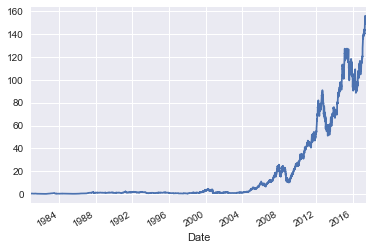

In [9]:
aapl_df['Adj. Close'].plot(grid=True);

In [10]:
# Clean up the data
aapl = aapl_df[['Open', 'High', 'Low', 'Adj. Close', 'Volume']]

In [11]:
# Describe out data
aapl.describe()

,Open,High,Low,Adj. Close,Volume
count,9202.000000,9202.000000,9202.000000,9202.000000,9.202000e+03
mean,99.899170,101.132275,98.562014,18.597611,1.160422e+07
std,136.297159,137.436185,134.939884,33.790297,1.649691e+07
min,11.120000,11.120000,11.000000,0.162387,4.471000e+03
25%,26.750000,27.250000,26.250000,0.912895,1.208850e+06
50%,43.015000,43.835000,42.500000,1.416724,3.584750e+06
75%,104.343750,106.052500,102.500000,16.702017,1.670170e+07
max,702.410000,705.070000,699.570000,156.100000,1.895606e+08


In [12]:
# Save our data
aapl.to_csv('Data/aapl_ohlc.csv')

# Reload our data
aapl = pd.read_csv('Data/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)

In [13]:
# .columns attribute
aapl.columns

Index(['Open', 'High', 'Low', 'Adj. Close', 'Volume'], dtype='object')

In [14]:
# .index attribute
aapl.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2017-05-26', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-05', '2017-06-06', '2017-06-07',
               '2017-06-08', '2017-06-09'],
              dtype='datetime64[ns]', name='Date', length=9202, freq=None)

In [15]:
# Subset the data
aapl['Adj. Close'].tail(10)

Date
2017-05-26    153.61
2017-05-30    153.67
2017-05-31    152.76
2017-06-01    153.18
2017-06-02    155.45
2017-06-05    153.93
2017-06-06    154.45
2017-06-07    155.37
2017-06-08    154.99
2017-06-09    148.98
Name: Adj. Close, dtype: float64

In [16]:
# Subsetting w/ .loc[] and .iloc[]
aapl.loc['2008-01-01':'2008-12-31']

,Open,High,Low,Adj. Close,Volume
Date,,,,,
2008-01-02,199.270,200.2600,192.550,25.141253,38542100.0
2008-01-03,195.410,197.3900,192.690,25.152866,30073800.0
2008-01-04,191.450,193.0000,178.890,23.232820,51994000.0
2008-01-07,181.250,183.6000,170.230,22.921844,74006900.0
2008-01-08,180.140,182.4600,170.800,22.097308,54422000.0
2008-01-09,171.300,179.5000,168.300,23.148947,64781500.0
2008-01-10,177.580,181.0000,175.410,22.970878,52963400.0
2008-01-11,176.000,177.8500,170.000,22.283119,44010200.0
2008-01-14,177.520,179.4200,175.170,23.068945,39301800.0


Resampling data

In [17]:
# Monthly resample
aapl.resample('M').mean().sample(7).sort_index()

,Open,High,Low,Adj. Close,Volume
Date,,,,,
1982-11-30,29.898095,30.988095,29.279048,0.445588,6.701333e+05
1983-07-31,44.249000,44.961500,42.874500,0.642891,6.914800e+05
1985-07-31,17.360455,17.475000,17.185455,0.253700,5.277182e+05
1987-04-30,71.565238,73.451905,70.565714,1.065794,1.448376e+06
1989-04-30,38.200000,38.913500,37.719500,1.148897,1.770725e+06
2000-07-31,54.038500,55.632500,52.299500,3.468471,5.131045e+06
2004-12-31,64.884318,65.557727,63.606818,4.161291,1.294530e+07


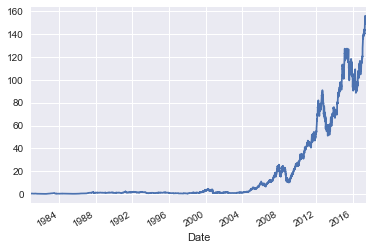

In [20]:
# Plot our data
aapl['Adj. Close'].plot(grid=True);

In [21]:
# Calculate log returns
aapl['log_return'] = np.log(aapl['Adj. Close'] / aapl['Adj. Close'].shift(-1))

In [22]:
# Resample on business months; takes last observation as a value
aapl.log_return.resample('BM').mean().head()

Date
1980-12-31   -1.402474e-02
1981-01-30    1.232957e-02
1981-02-27    4.610712e-18
1981-03-31    4.255536e-03
1981-04-30   -7.488955e-03
Freq: BM, Name: log_return, dtype: float64

In [23]:
# Calculate month-over-month returns
aapl.log_return.resample('BM').mean().pct_change()

Date
1980-12-31             NaN
1981-01-30   -1.879130e+00
1981-02-27   -1.000000e+00
1981-03-31    9.229670e+14
1981-04-30   -2.759815e+00
1981-05-29    3.321855e-02
1981-06-30   -2.480377e+00
1981-07-31   -8.428237e-01
1981-08-31    3.064884e+00
1981-09-30    1.198456e+00
1981-10-30   -1.766042e+00
1981-11-30   -1.287864e+00
1981-12-31   -3.130155e+00
1982-01-29   -1.587687e+00
1982-02-26    8.416538e-02
1982-03-31   -6.900029e-01
1982-04-30    3.842626e+00
1982-05-31   -2.838379e-01
1982-06-30   -2.540140e-01
1982-07-30   -2.163648e+00
1982-08-31    1.344053e+00
1982-09-30   -7.488002e-01
1982-10-29    5.636040e+00
1982-11-30   -4.720044e-01
1982-12-31   -1.643876e+00
1983-01-31   -4.045441e+00
1983-02-28   -6.961698e-01
1983-03-31   -1.943850e+00
1983-04-29   -2.679065e+00
1983-05-31   -7.057928e-02
                  ...     
2015-01-30   -2.754989e+00
2015-02-27    1.399590e-01
2015-03-31   -1.373291e+00
2015-04-30   -2.017872e+00
2015-05-29   -5.373597e-01
2015-06-30   -2.700931e

In [88]:
# Calculate quarterly returns
aapl.log_return.resample('4M').mean().sample(10).sort_index()

Date
1982-12-31    0.005959
1986-04-30    0.003837
1987-08-31    0.003641
1990-08-31   -0.000650
1990-12-31    0.001852
2002-04-30    0.001253
2003-08-31    0.005456
2005-04-30    0.001381
2007-04-30    0.002005
2015-08-31   -0.001125
Name: log_return, dtype: float64

In [24]:
# Calculate QoQ returns
aapl.log_return.resample("4M").mean().pct_change().head(7)

Date
1980-12-31          NaN
1981-04-30    -1.167754
1981-08-31     0.433146
1981-12-31    -1.099744
1982-04-30   -14.128321
1982-08-31    -1.366703
1982-12-31     2.543804
Freq: 4M, Name: log_return, dtype: float64

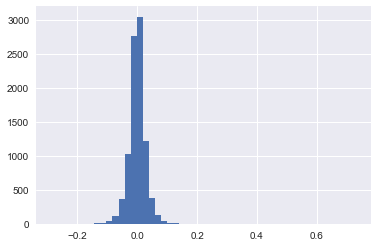

In [212]:
# Plot distribution of pct change daily log returns
aapl.log_return.hist(bins=50);

In [25]:
# Plot distribution of daily pct change
aapl.daily_returns.hist(bins=50);

AttributeError: 'DataFrame' object has no attribute 'daily_returns'

In [213]:
# Describe the data
aapl.log_return.describe()

count    9161.000000
mean       -0.000626
std         0.029756
min        -0.286796
25%        -0.015129
50%         0.000000
75%         0.013955
max         0.731247
Name: log_return, dtype: float64

In [214]:
# Describe
aapl.daily_returns.describe()

count    9162.000000
mean        0.001059
std         0.029287
min        -0.518692
25%        -0.013873
50%         0.000000
75%         0.015243
max         0.332152
Name: daily_returns, dtype: float64

In [26]:
# Add the daily log pct change to the DF
aapl['log_pctChange'] = aapl.log_return.pct_change()

# Drop NaN
aapl = aapl.dropna()

In [27]:
# Check the work
aapl

,Open,High,Low,Adj. Close,Volume,log_return,log_pctChange
Date,,,,,,,
1980-12-15,27.3800,27.38,27.25,0.402277,785200.0,0.076227,0.422570
1980-12-16,25.3700,25.37,25.25,0.372752,472000.0,-0.024258,-1.318230
1980-12-17,25.8700,26.00,25.87,0.381905,385900.0,-0.028954,0.193610
1980-12-18,26.6300,26.75,26.63,0.393125,327900.0,-0.059055,1.039588
1980-12-19,28.2500,28.38,28.25,0.417040,217100.0,-0.047694,-0.192382
1980-12-22,29.6300,29.75,29.63,0.437412,166800.0,-0.041321,-0.133613
1980-12-23,30.8800,31.00,30.88,0.455865,209600.0,-0.051131,0.237407
1980-12-24,32.5000,32.63,32.50,0.479780,214300.0,-0.088293,0.726780
1980-12-26,35.5000,35.62,35.50,0.524068,248100.0,-0.013986,-0.841592


In [113]:
# Take the regular returns
aapl['daily_returns'] = aapl['Adj. Close'].pct_change()

# Dropna
aapl = aapl.dropna()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
aapl

,Open,High,Low,Adj. Close,Volume,log_return,log_pctChange
Date,,,,,,,
1980-12-15,27.3800,27.38,27.25,0.402277,785200.0,0.076227,0.422570
1980-12-16,25.3700,25.37,25.25,0.372752,472000.0,-0.024258,-1.318230
1980-12-17,25.8700,26.00,25.87,0.381905,385900.0,-0.028954,0.193610
1980-12-18,26.6300,26.75,26.63,0.393125,327900.0,-0.059055,1.039588
1980-12-19,28.2500,28.38,28.25,0.417040,217100.0,-0.047694,-0.192382
1980-12-22,29.6300,29.75,29.63,0.437412,166800.0,-0.041321,-0.133613
1980-12-23,30.8800,31.00,30.88,0.455865,209600.0,-0.051131,0.237407
1980-12-24,32.5000,32.63,32.50,0.479780,214300.0,-0.088293,0.726780
1980-12-26,35.5000,35.62,35.50,0.524068,248100.0,-0.013986,-0.841592


Cumulative daily rate of return
- CDRR = cumulative_product(daily_pct_change + 1)

In [29]:
# Cumulative daily return
cdr = (1 + aapl.daily_returns).cumprod()

# Plot
cdr.plot(grid=True);

AttributeError: 'DataFrame' object has no attribute 'daily_returns'

Get other equity data similar to AAPL; MSFT, GOOG, etc.

In [30]:
# Function to get data on tickers
def get_ticker_data(tickers, start_date, end_date):
    # Create a list to hold the data
    data_list = []
    
    # Query Quandl
    for ticker in tickers:
        # print("Getting {}".format(ticker), '\n')
        
        # Assign data
        ticker_df = pd.DataFrame(Quandl.get("WIKI/{}".format(ticker), trim_start=start_date,
                                    trim_end=end_date, api_key=api)['Adj. Close'])
        # Rename
        ticker_df.columns = [str(ticker)]
        
        # Calculate the % returns
        ticker_df[str(ticker)] = np.log(ticker_df[str(ticker)] / ticker_df[str(ticker)].shift(-1))
        
        # Clean
        ticker_df.dropna(inplace=True)
        
        # Append to our list
        data_list.append(ticker_df)
        
    # Return a list of data
    return data_list

In [34]:
# Create list of tickers
tickers = ['GOOG','AAPL','MSFT', 'IBM', 'FB']
data = get_ticker_data(tickers, start_date='2010-01-02', end_date='2017-06-02')

In [37]:
# Join all the tickers into one column
tech_df = join_on_index(data)

In [38]:
# Check
tech_df.head()

,GOOG,AAPL,MSFT,IBM,FB
Date,,,,,
2014-03-27,-0.002736,0.001117,-0.023601,-0.003261,0.015871
2014-03-28,0.005408,0.000224,-0.016977,-0.010655,-0.003825
2014-03-31,-0.018130,-0.009106,-0.010436,-0.010388,-0.038748
2014-04-01,0.000282,-0.001660,0.001691,0.004896,-0.001596
2014-04-02,-0.004821,0.006954,0.008256,0.004453,0.052872


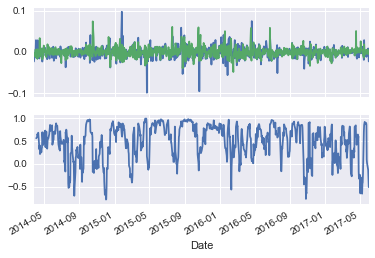

In [39]:
# Plot the two graphs
# Create the figures
ax_1 = plt.subplot2grid((2,1), (0,0))
ax_2 = plt.subplot2grid((2,1),(1,0), sharex=ax_1)

# Plot
tech_df.MSFT.plot(ax=ax_1, label='MSFT')
tech_df.IBM.plot(ax=ax_1, label='IBM')
tech_df.IBM.rolling(7).corr(tech_df.MSFT).plot(ax=ax_2);

Comparing volatility is useful because it allows you to determine the riskier asset in comparison to a another similar asset.

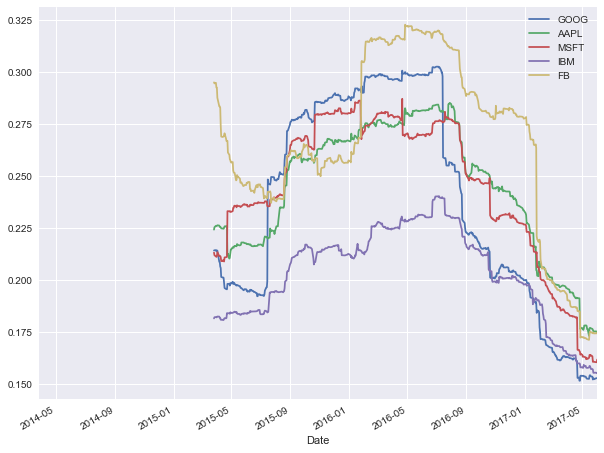

In [40]:
# Calculate rolling volatility of the techs
# Periods
periods = 252

# Plot vol
(tech_df.rolling(periods).std() * np.sqrt(periods)).plot(figsize=(10,8));

Quick trading strategy. Use the other stock's returns to predict returns of FB.

In [41]:
# Prepare the data

# Reassign DF
df_tech = tech_df

# Create a label column
def make_label(val):
    # If the value > 0, 1
    if val > 0:
        return 1
    else:
        return 0

# Make labels
df_tech['FB_1'] = df_tech.FB.map(make_label)

# Shift the data
df_tech['FB_1'] = df_tech.FB_1.shift(3)

In [43]:
# Check
df_tech.head()

,GOOG,AAPL,MSFT,IBM,FB,FB_1
Date,,,,,,
2014-03-27,-0.002736,0.001117,-0.023601,-0.003261,0.015871,NaN
2014-03-28,0.005408,0.000224,-0.016977,-0.010655,-0.003825,NaN
2014-03-31,-0.018130,-0.009106,-0.010436,-0.010388,-0.038748,NaN
2014-04-01,0.000282,-0.001660,0.001691,0.004896,-0.001596,1.0
2014-04-02,-0.004821,0.006954,0.008256,0.004453,0.052872,0.0


In [46]:
# Drop NaN
df_tech = df_tech.dropna()

In [66]:
# Split the data into train and test sets
n = int(np.floor(len(df_tech) * 0.80))
n_2 = int(np.floor(len(df_tech) * 0.20))
X_train = df_tech[['MSFT', 'GOOG', 'AAPL', 'IBM']][:n]
y_train = df_tech[['FB_1']][:n]

X_test = df_tech[['MSFT', 'GOOG', 'AAPL', 'IBM']][(n_2):]
y_test = df_tech[['FB_1']][(n_2):]

In [67]:
y_train[:10]

,FB_1
Date,
2014-04-01,1.0
2014-04-02,0.0
2014-04-03,0.0
2014-04-04,0.0
2014-04-07,1.0
2014-04-08,1.0
2014-04-09,0.0
2014-04-10,0.0
2014-04-11,0.0


In [68]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logit = LogisticRegression(C=0.10)

# Fit the data
logit.fit(X_train, y_train)

# Predict
logit_y_hat = logit.predict(X_test)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
# Let's see how we did...
from sklearn.metrics import log_loss

# show
print("Log-Loss: {:.3f}".format(log_loss(y_true=y_test, y_pred=logit_y_hat)))

from sklearn.metrics import accuracy_score

print("Accuracy: {:.3f}".format(accuracy_score(y_test, logit_y_hat)))

Log-Loss: 15.704
Accuracy: 0.545


In [70]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit
rf = RandomForestClassifier().fit(X_train, y_train)

# PRedict
rf_y_hat = rf.predict(X_test)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [71]:
# Score
print("log-loss: {:.3f}".format(log_loss(y_test, rf_y_hat)))

log-loss: 5.289


Can we do better by tuning the RandomForest?

In [78]:
y_train.values.ravel()

array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0

In [87]:
from sklearn.cross_validation import cross_val_score

In [79]:
# Grid Search CV
from sklearn.grid_search import GridSearchCV

# Create parameter candidates
param_search  = {'n_estimators': [10, 100, 250, 350], 'criterion': ['gini', 'entropy'],
                 'max_features': ["auto", 'sqrt', 'log2', None]}

# Grid-Search
gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_search, cv=5, scoring='log_loss')

# Fit the data to get the best params
gs.fit(X_train.values, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2', None], 'n_estimators': [10, 100, 250, 350]},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [82]:
# Print best score
print("Best score: {:.3f}".format(gs.best_score_))

# Print best params
print("Best params: {}".format(gs.best_params_))

# Print best estimator
print("Best estimator: {}".format(gs.best_estimator_))

Best score: -0.718
Best params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 350}
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [329]:
#Let's get more features to put into our DataFrame to see which ones are predictive

# London Metal Exchange data
def get_lme_data(tickers, start_date, end_date):
    # Create a list to hold the data
    df_list = []
    
    # Query quandl
    for ticker in tickers:
        data = Quandl.get("LME/{}".format(ticker), trim_start=start_date, trim_end=end_date,
                         api_key=api)['Adj. Close']
        
        # Change column name
        data.columns = [str(ticker)]
        
        # Calculate log returns
        data[ticker] = np.log(data.ticker / data.ticker.shift(-1))
        
        # Add to the list
        df_list.append(data)
    
    # Return metals data
    return df_list

In [116]:
# Get S&P 500 data

# SPY DataFrame
spy_df = pd.read_csv("https://raw.githubusercontent.com/NickyThreeNames/DataquestGuidedProjects/master/Guided%20Project-%20Predicting%20the%20stock%20market/sphist.csv")

In [118]:
# Set the data
spy_df.set_index("Date",inplace=True)

In [121]:
# Sort
spy_df.sort_index(inplace=True)

In [126]:
# Calculate log return data
spy_df['close_return'] = np.log(spy_df['Adj Close']/spy_df['Adj Close'].shift(-1))

In [127]:
# Make labels for classification
spy_df['label'] = spy_df.close_return.map(make_label)

In [129]:
# Calculate 5, 30, and 365 day average log returns
spy_df['5d_return_avg'] = spy_df.close_return.rolling(5).mean().shift(1)
spy_df['30d_return_avg'] = spy_df.close_return.rolling(30).mean().shift(1)
spy_df['365d_return_avg'] = spy_df.close_return.rolling(365).mean().shift(1)

# Calculate standard deviation of the returns w/ same time periods
spy_df['5d_return_std'] = spy_df.close_return.rolling(5).std().shift(1)
spy_df['30d_return_std'] = spy_df.close_return.rolling(30).std().shift(1)
spy_df['365d_return_std'] = spy_df.close_return.rolling(365).std().shift(1)

In [130]:
# Drop NaN
spy_df = spy_df.dropna()

In [132]:
# Drop uneeded data
spy_df = spy_df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1)

In [175]:
# Check
spy_df.head()

,close_return,label,5d_return_avg,30d_return_avg,365d_return_avg,5d_return_std,30d_return_std,365d_return_std
Date,,,,,,,,
1951-06-19,0.005008,1,-0.004594,0.000911,-0.000764,0.006330,0.007869,0.008807
1951-06-20,0.005951,1,-0.003313,0.001048,-0.000719,0.007649,0.007905,0.008794
1951-06-21,0.010616,1,0.000550,0.001291,-0.000690,0.006003,0.007941,0.008799
1951-06-22,0.012138,1,0.004497,0.001453,-0.000653,0.004306,0.008083,0.008818
1951-06-25,-0.000469,0,0.007015,0.001590,-0.000604,0.004369,0.008232,0.008839


In [176]:
# Split the data into training and testing
X_train = spy_df[spy_df.index < '2013-1-1'].drop('label', axis=1)
y_train = spy_df[spy_df.index < '2013-1-1'].label

X_test = spy_df[spy_df.index >= '2013-1-1'].drop('label', axis=1)
y_test = spy_df[spy_df.index >= '2013-1-1'].label

In [177]:
# Create RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Grid-Search
from sklearn.grid_search import GridSearchCV

# Grid search params for the RFC
gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_search, cv=3, scoring='log_loss') 

# Find the best params
gs.fit(X_train.values, y_train.values.ravel())

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2', None], 'n_estimators': [10, 100, 250, 350]},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [178]:
# Print best score
print("Best score: {:.3f}".format(-1 * gs.best_score_))

# Print best params
print("Best params: {}".format(gs.best_params_))

# Print best estimator
print("Best estimator: {}".format(gs.best_estimator_))

Best score: 0.004
Best params: {'criterion': 'entropy', 'max_features': None, 'n_estimators': 100}
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [179]:
# Test our work
rcf = gs.best_estimator_

# Predict and score
from sklearn.metrics import log_loss

# Print
print('Log-loss {:.3f}'.format(log_loss(y_test, rcf.predict(X_test))))

Log-loss 0.000


In [181]:
from sklearn.cross_validation import cross_val_score

cross_val_score(estimator=rcf, X=X_test, y=y_test, cv=3, scoring='log_loss').mean()

-0.0015445024888487817